In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.shape

(8523, 12)

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   str    
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   str    
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   str    
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   str    
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   str    
 9   Outlet_Location_Type       8523 non-null   str    
 10  Outlet_Type                8523 non-null   str    
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), str(7)
memory usage: 799.2 KB


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df[df['Item_Weight'].isnull()]['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: count, dtype: int64

## Handling Null Values

In [9]:
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.median()))
df['Item_Weight'].isnull().sum()

np.int64(0)

#### Observation

Item_Weight is a numeric feature and imputing the null values based on Median of Item_Type

In [10]:
df[df['Outlet_Size'].isnull()]['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [11]:
df.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: count, dtype: int64

In [12]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))


#### Observation

'Outlet_Size' was associated with 'Outlet_Type'. Grocery Stores only operate as Small outlets and Supermarket Type1 had multiple size categories, so missing values were imputed using mode within each Outlet_Type.

In [13]:
df['Outlet_Size'].isnull().sum()

np.int64(0)

# Categorical Analysis

In [14]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'reg': 'Regular',
    'LF': 'Low Fat',
    'low fat': 'Low Fat'
})

In [16]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [17]:


df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [18]:


df['Item_Identifier'].value_counts()

Item_Identifier
FDG33    10
FDW13    10
FDV38     9
FDX20     9
FDP25     9
         ..
DRF48     1
FDC23     1
FDT35     1
FDE52     1
FDQ60     1
Name: count, Length: 1559, dtype: int64

In [19]:
df[df['Item_Type'] == 'Fruits and Vegetables']['Item_Identifier'].unique()


<StringArray>
['FDX07', 'FDY07', 'FDX32', 'FDF32', 'FDV20', 'FDA43', 'FDM20', 'FDF09',
 'FDG20', 'FDZ55',
 ...
 'FDH56', 'FDG32', 'FDK32', 'FDV19', 'FDV55', 'FDJ32', 'FDU19', 'FDE57',
 'FDD33', 'FDU43']
Length: 220, dtype: str

In [20]:
df[df['Item_Type'] == 'Others']['Item_Identifier'].unique()


<StringArray>
['NCN07', 'NCO55', 'NCM43', 'NCN55', 'NCO07', 'NCM31', 'NCK19', 'NCO43',
 'NCK31', 'NCM07', 'NCM55', 'NCL19', 'NCQ43', 'NCQ38', 'NCP50', 'NCM19',
 'NCI31', 'NCN14', 'NCL55', 'NCN43', 'NCJ31', 'NCP43', 'NCP55', 'NCL31',
 'NCO02', 'NCM26', 'NCN19', 'NCK07', 'NCL07', 'NCJ19']
Length: 30, dtype: str

In [21]:
df[df['Item_Type'] == 'Others']['Item_Identifier'].str[:2].value_counts()

Item_Identifier
NC    169
Name: count, dtype: int64

In [22]:
df[df['Item_Type'] == 'Soft Drinks']['Item_Identifier'].unique()

<StringArray>
['DRC01', 'DRH01', 'DRZ11', 'DRH37', 'DRI25', 'DRB48', 'DRE60', 'DRK49',
 'DRA12', 'DRJ13', 'DRI49', 'DRJ25', 'DRK12', 'DRD24', 'DRF49', 'DRL01',
 'DRY23', 'DRF36', 'DRK01', 'DRE49', 'DRD13', 'DRI37', 'DRI01', 'DRI13',
 'DRN36', 'DRD37', 'DRG01', 'DRH13', 'DRE25', 'DRK37', 'DRF01', 'DRH25',
 'DRE13', 'DRC12', 'DRB25', 'DRD49', 'DRJ24', 'DRD60', 'DRM48', 'DRE12',
 'DRM37', 'DRL37', 'DRC36', 'DRA24', 'DRH49', 'DRJ37', 'DRZ24', 'DRE37',
 'DRC13', 'DRK13', 'DRF25', 'DRG49', 'DRB13', 'DRF37', 'DRJ49', 'DRC25',
 'DRD01', 'DRA59', 'DRG48', 'DRF13', 'DRG37', 'DRH36', 'DRF60', 'DRE48',
 'DRD25', 'DRL60', 'DRD12', 'DRJ01', 'DRB24', 'DRF48', 'DRG13', 'DRN37',
 'DRL49', 'DRB01', 'DRE01', 'DRC24', 'DRG36', 'DRM49', 'DRC49', 'DRG25']
Length: 80, dtype: str

In [23]:
df['Item_Identifier'].str[:2].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

##### Observation

We can clearly observe that there are three categories. Let's create a 'Item_Category' feature

In [24]:
df['Item_Category'] = df['Item_Identifier'].str[:2]
df['Item_Category'] = df['Item_Category'].map({
    'FD': 'Food',
    'NC': 'Non-Consumable',
    'DR': 'Drinks'
})


In [25]:
df['Item_Category'].value_counts()

Item_Category
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [26]:
df['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [27]:
df['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [28]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [29]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

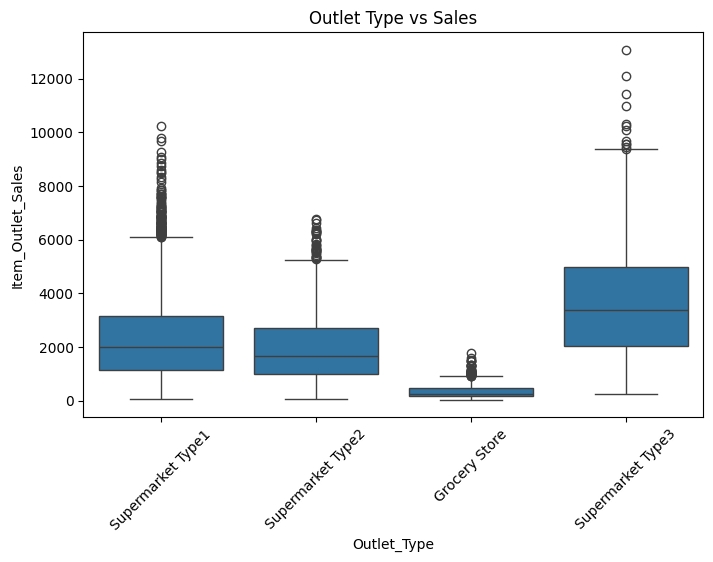

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=45)
plt.title("Outlet Type vs Sales")
plt.show()


In [31]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].median().sort_values(ascending=False)

Outlet_Type
Supermarket Type3    3364.9532
Supermarket Type1    1990.7420
Supermarket Type2    1655.1788
Grocery Store         256.9988
Name: Item_Outlet_Sales, dtype: float64

#### Observation
Supermarket Type3 has the highest median sales whereas the grocery store has low median sales, which indicates that well proper structured Supermarket generate more revenue.


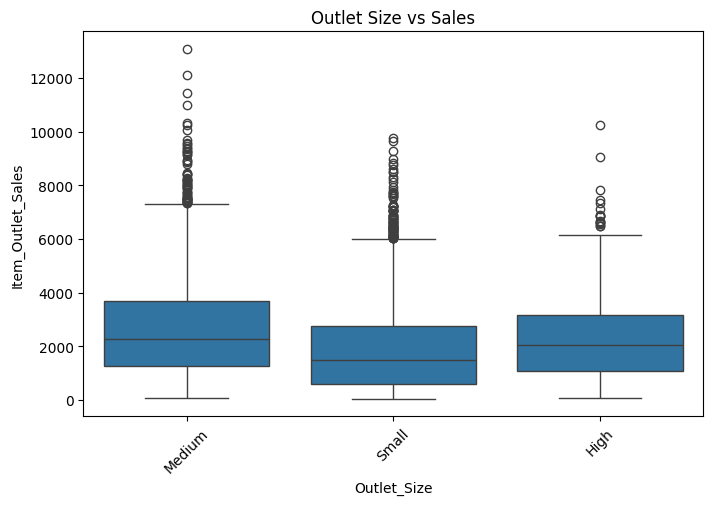

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=45)
plt.title("Outlet Size vs Sales")
plt.show()


In [33]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].median().sort_values(ascending=False)


Outlet_Size
Medium    2251.0698
High      2050.6640
Small     1484.0682
Name: Item_Outlet_Sales, dtype: float64

#### Observation
Medium size outlets has more influence on sales, so we can observe that large sized outlets doesn't gurarantee more sales


In [34]:
pd.pivot_table(df, values='Item_Outlet_Sales',index='Outlet_Type',
               columns='Outlet_Size',
               aggfunc='median')


Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,NaN,NaN,256.9988
Supermarket Type1,2050.664,1966.1074,1987.4130
Supermarket Type2,NaN,1655.1788,NaN
Supermarket Type3,NaN,3364.9532,NaN


#### Observation

Since variation of sales in Outlet_Type is more than in Outlet_Size, we can clearly say that 'Outlet_Type' has more influence. 

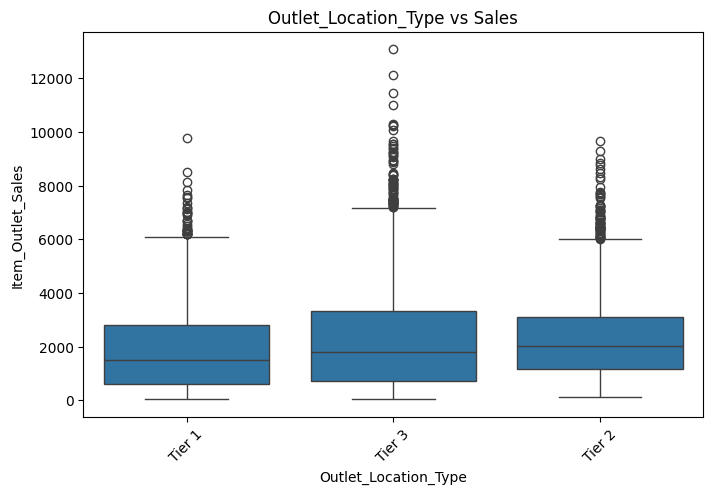

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=45)
plt.title("Outlet_Location_Type vs Sales")
plt.show()


In [36]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].median().sort_values(ascending=False)


Outlet_Location_Type
Tier 2    2004.0580
Tier 3    1812.3076
Tier 1    1487.3972
Name: Item_Outlet_Sales, dtype: float64

In [37]:
pd.crosstab(df['Outlet_Type'], df['Outlet_Location_Type'])


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,528,0,555
Supermarket Type1,1860,2785,932
Supermarket Type2,0,0,928
Supermarket Type3,0,0,935


#### Observation 

We can observe that Tier 3 has highest performing outlet type (Supermarket Type3), whereas Supermarket Type 2 has the highest performing Tier (Tier 2) in sales

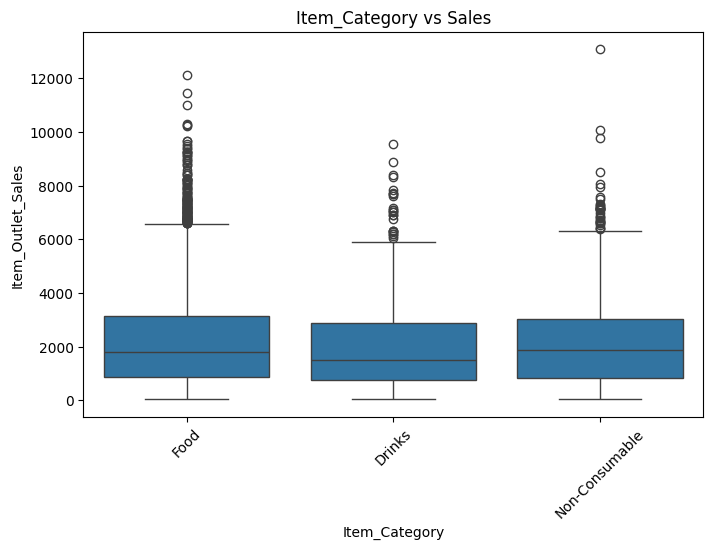

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Category', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=45)
plt.title("Item_Category vs Sales")
plt.show()

In [39]:
df.groupby('Item_Category')['Item_Outlet_Sales'].median().sort_values(ascending=False)


Item_Category
Non-Consumable    1874.8928
Food              1810.9760
Drinks            1496.7184
Name: Item_Outlet_Sales, dtype: float64

#### Observation 

Non-Consumables show the highest median sales, followed closely by Food, while Drinks underperform relative to other categories.

In [40]:
df.groupby('Item_Type')['Item_Outlet_Sales'].median().sort_values(ascending=False)


Item_Type
Seafood                  2055.3246
Household                1981.4208
Starchy Foods            1968.1048
Snack Foods              1944.1360
Breads                   1860.2452
Canned                   1860.2452
Fruits and Vegetables    1830.9500
Meat                     1829.6184
Hard Drinks              1816.6353
Others                   1713.7692
Frozen Foods             1687.1372
Health and Hygiene       1669.4935
Dairy                    1650.8511
Baking Goods             1577.9460
Breakfast                1554.6430
Soft Drinks              1518.0240
Name: Item_Outlet_Sales, dtype: float64

In [41]:
df.groupby('Item_Type')['Item_Outlet_Sales'].agg(['median','count']).sort_values(by='median', ascending=False)


,median,count
Item_Type,,
Seafood,2055.3246,64
Household,1981.4208,910
Starchy Foods,1968.1048,148
Snack Foods,1944.1360,1200
Breads,1860.2452,251
Canned,1860.2452,649
Fruits and Vegetables,1830.9500,1232
Meat,1829.6184,425
Hard Drinks,1816.6353,214


#### Observation
Even though Seafood has the highest median sales, its sample size is relatively less but when we look at Snack Foods which has a balance in size and sales so we can state that Snack Foods is a reliable Item for highest sales

In [42]:
pd.crosstab(df['Outlet_Type'], df['Item_Type'])['Snack Foods']


Outlet_Type
Grocery Store        146
Supermarket Type1    785
Supermarket Type2    132
Supermarket Type3    137
Name: Snack Foods, dtype: int64

In [43]:
df[df['Item_Type'] == 'Snack Foods'].groupby('Outlet_Type')['Item_Outlet_Sales'] \
    .median().sort_values(ascending=False)


Outlet_Type
Supermarket Type3    3523.4136
Supermarket Type1    2087.2830
Supermarket Type2    1871.5638
Grocery Store         309.5970
Name: Item_Outlet_Sales, dtype: float64

#### Observation
Snack Foods appear more frequently in Supermarket Type1, but they generate significantly higher sales in Supermarket Type3. This suggests that store format and customer base influence revenue more strongly than just product availability.


# Numerical Analysis

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

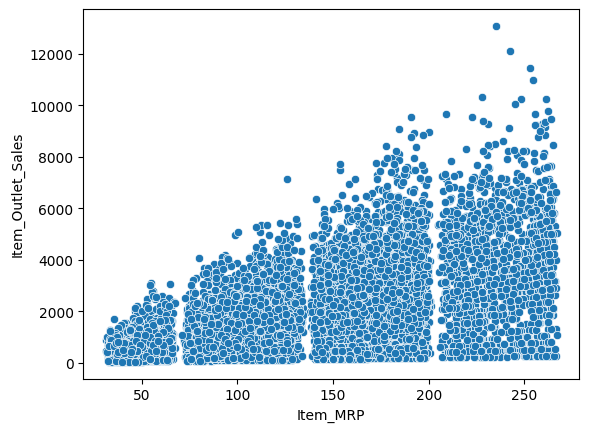

In [44]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)

In [45]:
df[['Item_MRP', 'Item_Outlet_Sales']].corr()


,Item_MRP,Item_Outlet_Sales
Item_MRP,1.000000,0.567574
Item_Outlet_Sales,0.567574,1.000000


#### Observation
There is a moderately strong positive correlation (0.57) between Item_MRP and sales. This confirms that higher-priced items tend to generate higher revenue. 

In [46]:
df.corr(numeric_only=True)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013384,0.026537,0.007724,0.010188
Item_Visibility,-0.013384,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.026537,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007724,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.010188,-0.128625,0.567574,-0.049135,1.000000


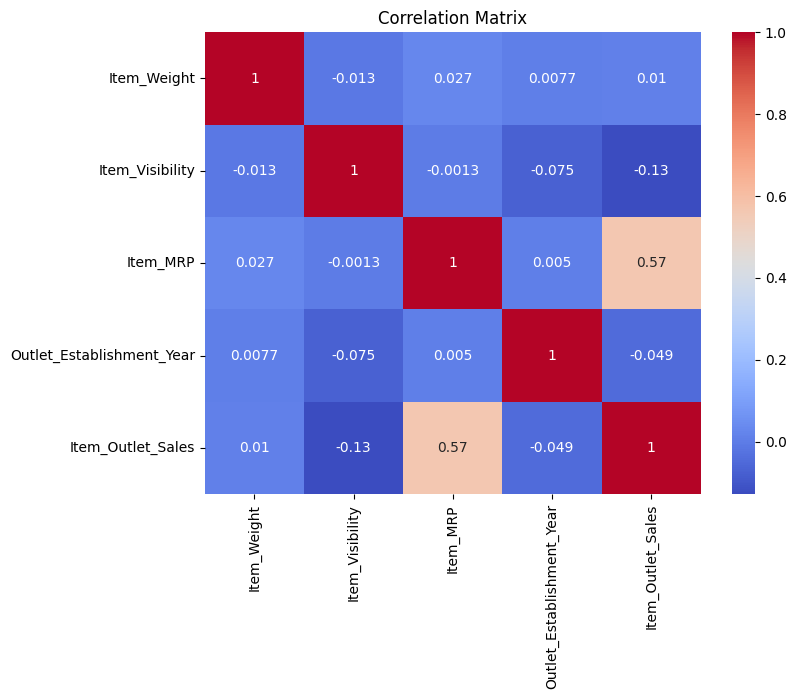

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#### Observation

Numerical analysis indicates that Item_MRP is the strongest linear predictor of sales, showing a moderate positive correlation (0.57). Other numerical features showcases weak linear relationships, suggesting that sales performance is influenced more by pricing and outlet level categorical factors.